<a href="https://colab.research.google.com/github/andheartsjaz/Data-Science-Assignments-Thinkful/blob/master/NLP_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline 
%pylab inline
#NLP

import chardet
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from pylab import rcParams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.manifold import TSNE



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=  pd.read_csv('/content/datasets_488316_909710_pink_floyd_lyrics.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   album       163 non-null    object
 1   song_title  163 non-null    object
 2   year        163 non-null    object
 3   lyrics      125 non-null    object
dtypes: object(4)
memory usage: 5.2+ KB


In [ ]:
df.head()
df.info()

rcParams['figure.figsize'] = 10, 8
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(df.track_name.values))

plt.imshow(wordcloud, interpolation = 'bilinear');

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   album       163 non-null    object
 1   song_title  163 non-null    object
 2   year        163 non-null    object
 3   lyrics      125 non-null    object
dtypes: object(4)
memory usage: 5.2+ KB


First, make sure to clean your data. You can use the data cleaning techniques we covered in the second checkpoint. However, every text data is likely to have its own peculiar cleaning requirements. So, you should make sure that you clean your dataset appropriately.

In [ ]:
df['lyrics'] = df['lyrics'].str.lower().replace(r'\n',' ')

stop_words_en = list(stopwords.words("english"))

punctuations = list(string.punctuation)
forbidden = ['(',')',"'",',','oh',"'s", 'yo',"'ll", 'el', "'re","'m","oh-oh","'d", "n't", "``", "ooh", "uah", "'em", "'ve", "eh", "pa", "brr", "yeah"] 
stop_words_all = set(stop_words_en + punctuations + forbidden)

In [ ]:
def cleanse_text(tokens):
    return [i for i in tokens if ((i not in list(stop_words_all)) and (re.search(r'\d+', i) == None)) ]

df=df.dropna()

songs = []
for song in df.lyrics.values:
  songs.append(cleanse_text(word_tokenize(song)))

  word2vec = Word2Vec(songs, min_count=5)

Convert your text features into numerical form. You're free to choose your method. You can use BoW, tf-idf, word2vec or any other method you'd like to experiment. We recommend to use several methods so that you can compare the results with respect to the methods you apply. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


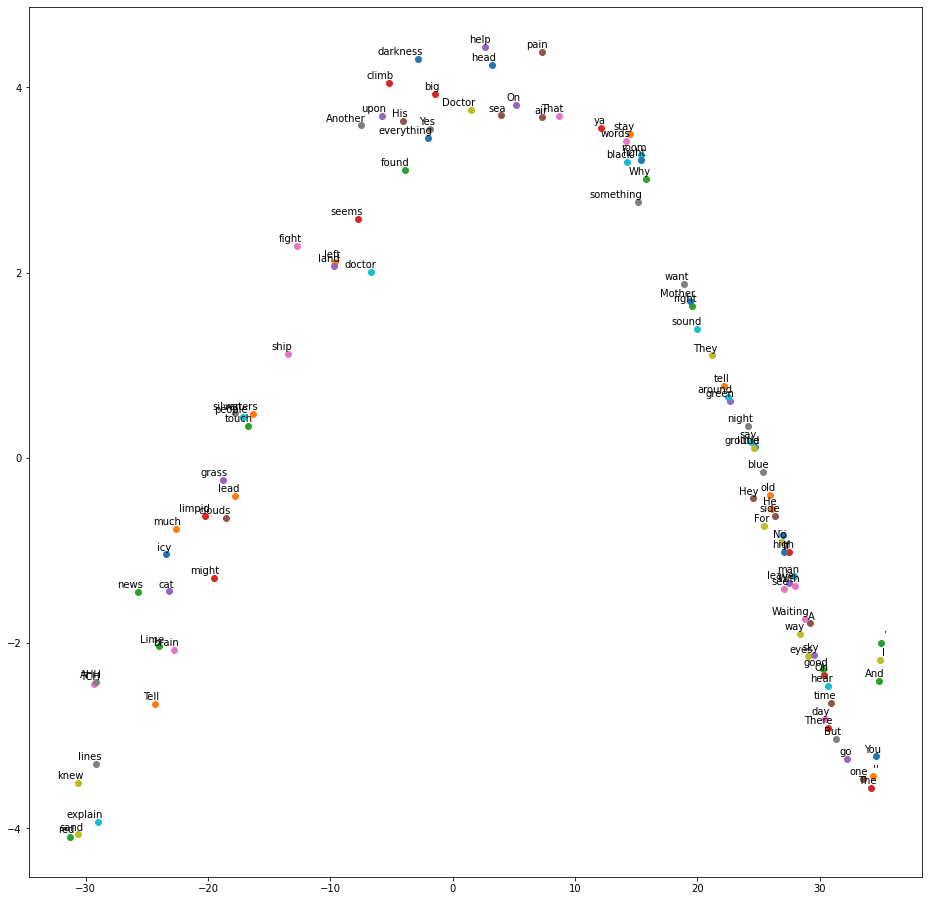

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x[:100])): #only top 200 words due to run time issue
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show();

tsne_plot(word2vec)

You can choose whatever NLP task you want. You're completely free on your choice. Some possible options are:

    Sentiment analysis.
    Text classification.
    Topic modeling.
    Developing a more sophisticated chatbot that what we developed in this module.
    Training a deep learning model for a supervised or unsupervised task you choose.


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

# components for features reduction
n_components = 5

# number of clusters we want
n_clusters = 5

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(df['lyrics'])

# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(X_2d)

# display by groups
df_plot = pd.DataFrame(list(X_2d), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4
0        2  0.065259 -0.049408  0.149334  0.944664  0.146207
1        0  0.050759 -0.018277  0.005050  0.001838 -0.008851
2        0  0.192368 -0.066615 -0.083847  0.003385 -0.078931
3        0  0.101318 -0.047657  0.003196  0.072745 -0.079844
4        0 -0.000027  0.000358 -0.006471  0.000723 -0.009970
         Cluster
Cluster         
0            107
1              6
2              2
3              2
4              8
